In [1]:
%pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu126

Looking in indexes: https://download.pytorch.org/whl/nightly/cu126
  Using cached https://download.pytorch.org/whl/nightly/filelock-3.16.1-py3-none-any.whl (16 kB)
  Using cached https://download.pytorch.org/whl/nightly/typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Using cached https://download.pytorch.org/whl/nightly/sympy-1.13.3-py3-none-any.whl (6.2 MB)
  Using cached https://download.pytorch.org/whl/nightly/networkx-3.4.2-py3-none-any.whl (1.7 MB)
  Using cached https://download.pytorch.org/whl/nightly/jinja2-3.1.4-py3-none-any.whl (133 kB)
  Using cached https://download.pytorch.org/whl/nightly/fsspec-2024.10.0-py3-none-any.whl (179 kB)
  Using cached https://download.pytorch.org/whl/nightly/setuptools-70.2.0-py3-none-any.whl (930 kB)
  Using cached https://download.pytorch.org/whl/nightly/numpy-2.1.2-cp312-cp312-win_amd64.whl (12.6 MB)
  Using cached https://download.pytorch.org/whl/nightly/pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
  Using cached https://download.pyt

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='data/cifar10-64/train', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='data/cifar10-64/test', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

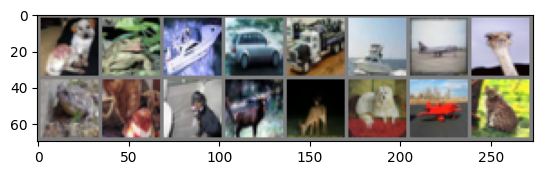

dog   frog  ship  car   truck ship  plane bird  frog  cat   dog   deer  deer  dog   plane cat  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Playing on {device}")

net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Playing on cuda


In [8]:
for epoch in tqdm(range(10)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        

        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

  0%|          | 0/10 [00:00<?, ?it/s]

[1,  2000] loss: 2.239


 10%|█         | 1/10 [00:10<01:37, 10.80s/it]

[2,  2000] loss: 1.642


 20%|██        | 2/10 [00:22<01:29, 11.25s/it]

[3,  2000] loss: 1.443


 30%|███       | 3/10 [00:32<01:15, 10.84s/it]

[4,  2000] loss: 1.324


 40%|████      | 4/10 [00:43<01:03, 10.66s/it]

[5,  2000] loss: 1.227


 50%|█████     | 5/10 [00:53<00:52, 10.49s/it]

[6,  2000] loss: 1.155


 60%|██████    | 6/10 [01:03<00:41, 10.49s/it]

[7,  2000] loss: 1.102


 70%|███████   | 7/10 [01:14<00:31, 10.42s/it]

[8,  2000] loss: 1.045


 80%|████████  | 8/10 [01:24<00:20, 10.30s/it]

[9,  2000] loss: 0.987


 90%|█████████ | 9/10 [01:35<00:10, 10.60s/it]

[10,  2000] loss: 0.956


100%|██████████| 10/10 [01:46<00:00, 10.66s/it]

Finished Training


In [11]:
PATH = 'models/cifar_net-v0.pth'
torch.save(net.state_dict(), PATH)

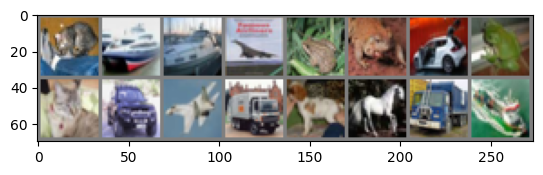

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 


In [13]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

outputs = net(images)

In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels))))

Predicted:  dog   ship  car   plane frog  frog  car   frog  cat   car   plane truck frog  horse truck ship 


In [15]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 63 %


In [16]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 64.4 %
Accuracy for class: car   is 84.2 %
Accuracy for class: bird  is 54.9 %
Accuracy for class: cat   is 33.1 %
Accuracy for class: deer  is 50.2 %
Accuracy for class: dog   is 54.3 %
Accuracy for class: frog  is 77.7 %
Accuracy for class: horse is 68.2 %
Accuracy for class: ship  is 81.5 %
Accuracy for class: truck is 62.0 %
